In [0]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.datasets import cifar10


((train_data, train_label), (test_data, test_label)) = cifar10.load_data()

In [48]:
# 除以 255 讓顏色數值收斂到 0~1, 會讓後續訓練模型時, 可以提高準確率
train_x = train_data / 255
test_x = test_data / 255

# one hot encoding
train_label_onehot = tf.keras.utils.to_categorical(train_label, 10)
test_label_onehot = tf.keras.utils.to_categorical(test_label, 10)


# Build Model
model = keras.Sequential()

model.add(layers.Conv2D(input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3]),
                        filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid',
                        activation = 'relu'))
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid',activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
# model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid',activation = 'relu'))
# model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid',activation = 'relu'))
# model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(),
             # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                200736    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 211,210
Trainable params: 211,210
Non-trainable params: 0
________________________________________________

In [54]:
history = model.fit(train_x, train_label, batch_size = 64, epochs = 5, validation_split = 0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 102s 2ms/sample - loss: 1.0661 - acc: 0.6243 - val_loss: 1.0176 - val_acc: 0.6466
Epoch 2/5
45000/45000 [==============================] - 102s 2ms/sample - loss: 0.9557 - acc: 0.6670 - val_loss: 1.0038 - val_acc: 0.6586
Epoch 3/5
45000/45000 [==============================] - 102s 2ms/sample - loss: 0.8857 - acc: 0.6915 - val_loss: 0.9829 - val_acc: 0.6638
Epoch 4/5
45000/45000 [==============================] - 102s 2ms/sample - loss: 0.8328 - acc: 0.7105 - val_loss: 0.9668 - val_acc: 0.6720
Epoch 5/5
45000/45000 [==============================] - 102s 2ms/sample - loss: 0.7823 - acc: 0.7282 - val_loss: 0.9522 - val_acc: 0.6814


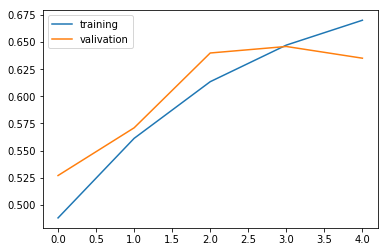

In [46]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [47]:
res = model.evaluate(test_x, test_label)

print(res)

10000/10000 [==============================] - 8s 751us/sample - loss: 1.0830 - acc: 0.6314
[1.083001509666443, 0.6314]


In [0]:
label_desc = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_picture_label_prediction(datas, labels, predictions, indexList):
    num = len(indexList)

    
    plt.gcf().set_size_inches(2 * 5, (2+0.4) * math.ceil(num / 5)) # 設定畫布的寬（參數 1）與高（參數 2）

    loc = 0
    for i in indexList :
        loc += 1 # 目前要在畫布上的哪個位置顯示 (從 1 開始)
        
        subp = plt.subplot(math.ceil(num / 5), 5, loc) # 畫布區分為幾列（參數 1）, 幾欄（參數 2）, 目前在哪個位置（參數 3）

        subp.imshow(datas[i], cmap='binary') # 畫布上顯示圖案, 其中 cmap=binary 為顯示黑白圖案

        # 設定標題內容，有預測結果資料, 才在標題顯示預測結果
        if(len(predictions) > 0) :
            title = 'ai = ' + label_desc[ predictions[i] ]
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') # 預測正確顯示(o), 錯誤顯示(x)
            title += '\nlabel = ' + label_desc[ labels[i] ]
        # 沒有 AI 預測結果資料, 則只在標題顯示真實數值
        else :
            title = 'label = ' + label_desc[ labels[i] ]
            
        subp.set_title(title, fontsize = 12)# 在畫布上顯示標題, 且字型大小為 12

        # X, Y 軸不顯示刻度
        subp.set_xticks([])
        subp.set_yticks([])

    plt.show()

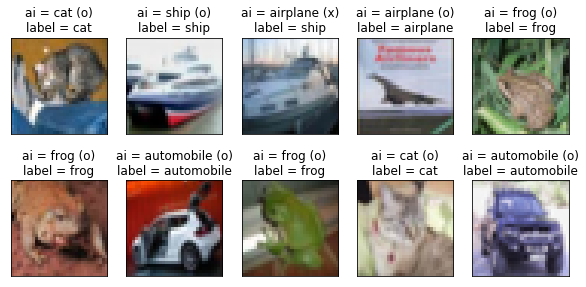

############### 10


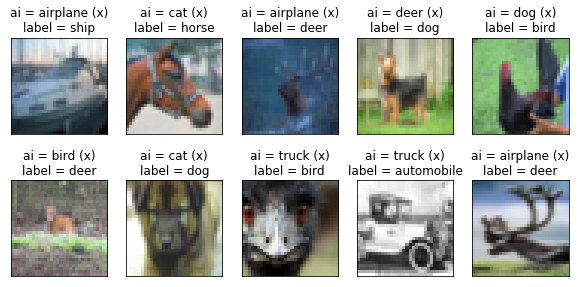

In [41]:
test_label_ = test_label.reshape(len(test_label))
test_pred = model.predict_classes(test_x)

print('畫出前十張圖片與預測結果')
show_picture_label_prediction(test_data, test_label_, test_pred, range(0, 10)) # 畫出前十張圖片與預測結果



err_pred = np.argwhere(test_label_ != test_pred)
err_pred_10 = err_pred[:10].reshape(10)

print('畫出前十張預測錯誤的圖片與結果')
show_feature_label_prediction(test_data, test_label_, test_pred, err_pred_10) # 畫出前十張預測錯誤的圖片與結果